# Simple Analytics for Paramount+ Streaming - Marketing Analytics and Data Integration Candidate

This is a simple analytics for me applying the BI analyst position at Paramount+. This brief analysis will answer a few questions below:

1. Explore and describe the dataset from high level.
2. Visualize metric trends.
3. Potential problems and suggestions.

Since the dataset is very limited, I'll focus on data description and visualization. Machine learning models can be applied if more data is given.

## Data import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# import data from questionnaire
data = """
Season,Week - #,some metric
2014,Week - 1,1902134.474
2014,Week - 2,1740816.579
2014,Week - 3,2350373.5
2014,Week - 4,4181745.857
2014,Week - 5,1877182.625
2014,Week - 6,15025103.5
2014,Week – 7,3393847.333
2014,Week - 8,3868083.375
2014,Week - 9,3694420.25
2014,Week - 10,2658482.818
2014,Week - 11,1797267.875
2014,Week - 12,10188666.33
2014,Week - 13,1651593.389
2014,Week - 14,2230368.154
2014,Week - 15,3768319.5
2014,Week - 16,3316636.778
2014,Week - 17,30578150
2014,Week - 18,28704431
2014,Week – 19,2266045.143
2014,Week - 20,9125765.333
2015,Week  - 1,2542363.267
2015,Week - 2,3344546.273
2015,Week - 3,2259653.267
2015,Week - 4,2044262.75
2015,Week - 5,3186976.3
2015,Week - 6,3135986.6
2015,Week - 7,4295972.714
2015,Week - 8,1774106.167
2015,Week - 9,2950339.636
2015,Week - 10,1657712.737
2015,Week - 11,2687111.545
2015,Week - 12,2499467.538
2015,Week - 13,1568939.4
2015,Week - 14,1603058.579
2015,Week - 15,1830768.588
2015,Week - 16,1955979.875
2015,Week - 17,15436977.5
2015,Week - 18,6209068.2
2015,Week - 19,10251688
2015,Week - 20,1414833.222
"""

In [52]:
# save data locally

corrected_data = data.replace("Week –", "Week -")
with open('dumped_data.csv','w') as file:
    file.write(corrected_data.strip())

df=pd.read_csv('dumped_data.csv')

In [31]:
df.head()

,Season,Week - #,some metric
0,2014,Week - 1,1902134.474
1,2014,Week - 2,1740816.579
2,2014,Week - 3,2350373.500
3,2014,Week - 4,4181745.857
4,2014,Week - 5,1877182.625


In [28]:
df.describe()

,Season,some metric
count,40.00000,4.000000e+01
mean,2014.50000,5.174231e+06
std,0.50637,6.625825e+06
min,2014.00000,1.414833e+06
25%,2014.00000,1.895897e+06
50%,2014.50000,2.672797e+06
75%,2015.00000,3.946499e+06
max,2015.00000,3.057815e+07


This dataset could be seen as a weekly report on "some metric" for the first 20 weeks in 2014 and 2015.

For the sake of simplicity, I'll keep the name "some metric" as is.

## Data sorting, cleaning and exploring
I'll clean out errors in the dataset and calculate the basic values such as maximum, minimum, average before diving into analysis.

In [53]:
# Sorting values

df['Week_Number'] = df['Week - #'].apply(lambda x: int(x.split('-')[1].strip()))
df= df.sort_values(by=['Season', 'Week_Number'])
df.drop('Week - #',axis=1,inplace=True)
df.head()

,Season,some metric,Week_Number
0,2014,1902134.474,1
1,2014,1740816.579,2
2,2014,2350373.500,3
3,2014,4181745.857,4
4,2014,1877182.625,5


In [48]:
# calculate average, maximum and minimum for each year

avg=df.groupby('Season')['some metric'].mean()
max=df.loc[df.groupby('Season')['some metric'].idxmax()]
min=df.loc[df.groupby('Season')['some metric'].idxmin()]
print(f'The average for each year is:\n',avg,'\n\n',f'The maximum for each year is:\n',max,'\n\n',f'The minimum for each year is:\n',min)

The average for each year is:
 Season
2014    6.715972e+06
2015    3.632491e+06
Name: some metric, dtype: float64 

 The maximum for each year is:
     Season  some metric  Week_Number
16    2014   30578150.0           17
36    2015   15436977.5           17 

 The minimum for each year is:
     Season  some metric  Week_Number
12    2014  1651593.389           13
39    2015  1414833.222           20


In [49]:
# calculating the mean value for 2014 and 2015

mean_values = df.groupby('Season')['some metric'].mean().reset_index()
mean_values

,Season,some metric
0,2014,6.715972e+06
1,2015,3.632491e+06


## Mean value comparison of first 20 weeks in 2014 and 2015

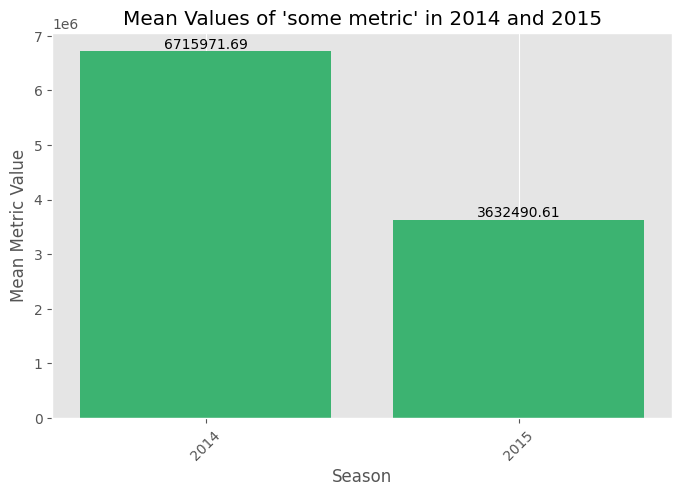

In [10]:
# plot mean values

plt.figure(figsize=(8, 5))
bars=plt.bar(mean_values['Season'].astype(str), mean_values['some metric'], color='mediumseagreen')
plt.title("Mean Values of 'some metric' in 2014 and 2015")
plt.xlabel('Season')
plt.ylabel('Mean Metric Value')
plt.xticks(rotation=45)
plt.grid(axis='y')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

We are witnessing a significant drop here from 2014 to 2015.

## Run chart for 2014 and 2015 separately

The run chart below shows the metric value for each week separated by the year 2014 and 2015, which provides a good sense of how the performance dropped from 2014 to 2015.

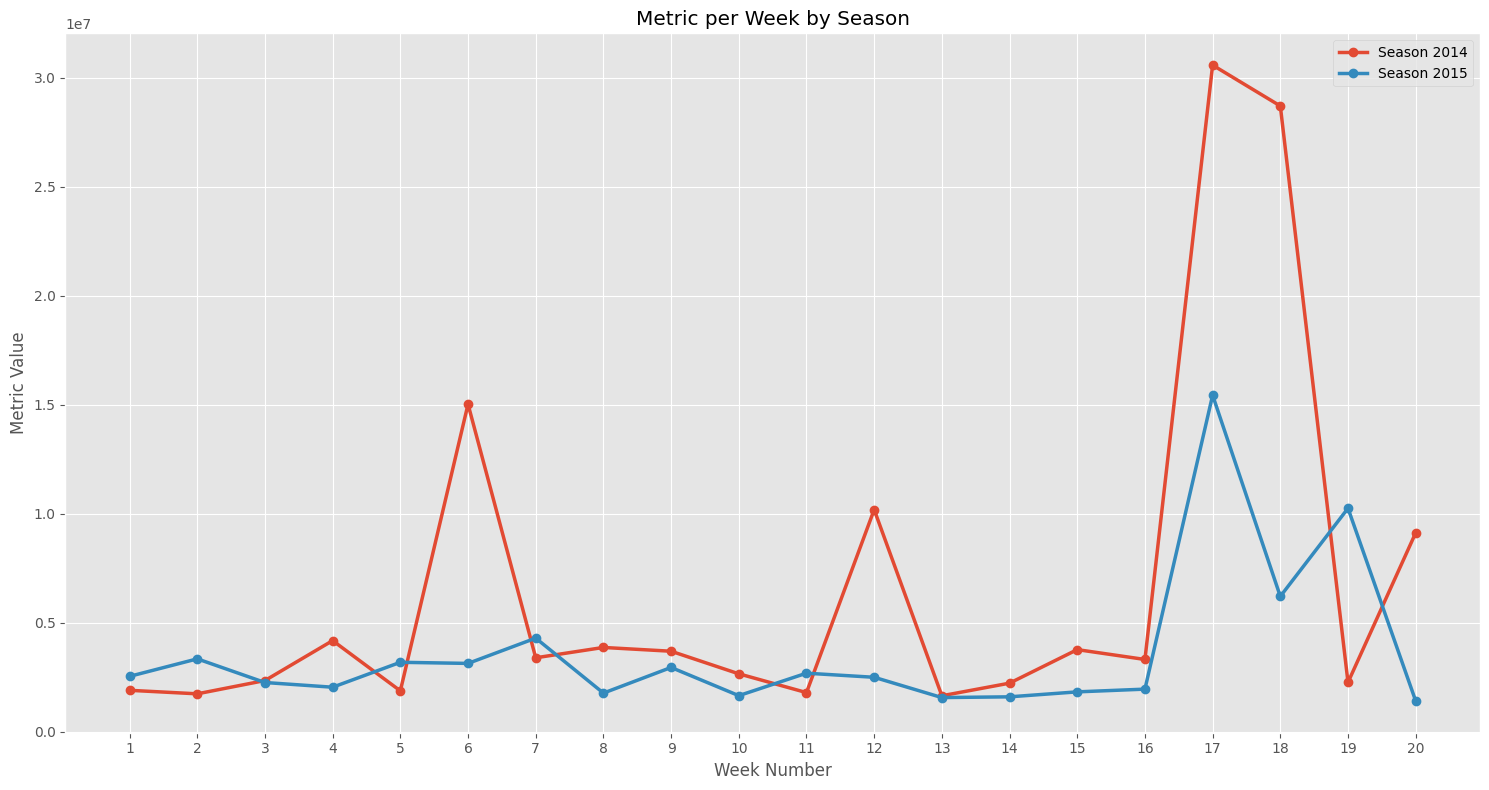

In [16]:
# [lotting the metric per week for each season
plt.figure(figsize=(15, 8))

# filtering data for each season and plotting
for season in df['Season'].unique():
    season_data = df[df['Season'] == season]
    plt.plot(season_data['Week_Number'], season_data['some metric'], marker='o', linewidth=2.5,label=f'Season {season}')

plt.title('Metric per Week by Season')
plt.xlabel('Week Number')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.xticks(range(1, df['Week_Number'].max() + 1)) 
plt.tight_layout()

plt.show()


## Conclusion

In 2014, we are seeing a surge on week 6, week 12, week 17, week 18 and week 20. In 2015, the curve is much flatter with the exception of week 17 to week 19. 

There should have been promotion happened or new movie released in the surge period.

Seems like similar promotion or new movie released or other action happened on week 17 to 19 on both 2014 and 2015. We are seeing a surge on both years on the same period but 2015 was not as effective.

After each surge, the value dropped back to normal level very quickly. User retention should be improved.